## Part 1: Dimensionality Reduction using PCA:-

In [85]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import csv
import random
import math
import operator
from numpy import linalg as LA
import sys

In [86]:
df = pd.read_csv('intrusion_detection/data1.csv') 

In [87]:
df.head()
# df.shape

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [88]:
temp=df['xAttack']
df1=df.drop(['xAttack'],axis=1)

In [89]:
# df1

In [90]:
M=np.mean(df1)
SD=np.std(df1)

In [91]:
# M

In [92]:
C=(df1-M)/SD

In [93]:
# C

In [94]:
Cov=np.cov(C.T)

In [95]:
# Cov

In [96]:
values, vectors = LA.eig(Cov)

In [97]:
# vectors

In [98]:
dc = {}
for i in range(len(values)):
    dc[values[i]] = vectors[i]
# dc
values

array([6.73792010e+00, 4.86394323e+00, 2.61304344e+00, 1.88825019e+00,
       1.47239103e+00, 1.34445489e+00, 1.13686784e+00, 1.05599217e+00,
       9.19031673e-01, 9.62884727e-01, 9.97747022e-01, 1.00605989e+00,
       7.16997425e-01, 6.55723024e-01, 4.96856883e-01, 4.47530656e-01,
       4.12119820e-01, 4.02113812e-01, 3.45219725e-01, 2.10204295e-01,
       9.70901692e-02, 6.64827642e-02, 5.21876041e-02, 3.96458945e-02,
       2.89025639e-02, 1.63697530e-02, 1.00407728e-03, 9.49076867e-03,
       4.63468452e-03])

In [200]:
values_sort=sorted(values,reverse=True)

# values_sort

In [217]:
su=0
i=0
abc=[]
# print(values_sort)
for i in range(len(values_sort)):
    su+=values_sort[i]
    abc.append(su)
su

29.001160139219163

In [224]:
tol=0
j=0
# print(j)
k_list=[]
tole=[]
for j in range(len(values_sort)):
    tol+=(values_sort[j]/su)
    tole.append(tol)
    k_list.append(values_sort[j])
    if tol>= .9:
        break

print('Accuracy:',tol)
print('Reduced Dimensions:',len(k_list))
# print(k_list)

li=[]
for i in range(len(k_list)):
    li.append(dc[k_list[i]])


li = np.asarray(li)
li = li.T

ans = np.dot(C, li)

print(df1.shape, li.shape, ans.shape)

Accuracy: 0.9093190252148047
Reduced Dimensions: 14
(24998, 29) (29, 14) (24998, 14)


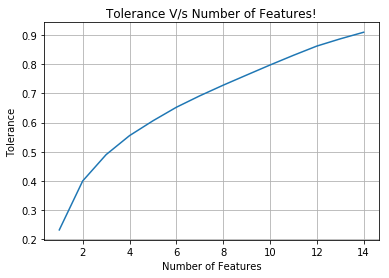

In [231]:
import matplotlib.pyplot as plt 

plt.plot([x for x in range(1,len(tole)+1)], tole)  

plt.xlabel('Number of Features') 
plt.ylabel('Tolerance') 
# plt.legend() 
plt.grid()
plt.title('Tolerance V/s Number of Features!') 
plt.show()

#### Final Data after reducing dimensions:

In [269]:
ans.shape

(24998, 14)

## Part 2: K-Means Clustering:-

In [277]:
k=5
n = ans.shape[0]
c = ans.shape[1]
mean = np.mean(ans, axis = 0)
std = np.std(ans, axis = 0)
centers = np.random.randn(k,c)*std + mean
# plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [278]:
from copy import deepcopy
co = np.zeros(centers.shape)
cn = deepcopy(centers) 
# ans.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
marg = LA.norm(cn - co)
while marg != 0:
    for i in range(k):
        distances[:,i] = LA.norm(ans - cn[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    co = deepcopy(cn)
    for i in range(k):
        cn[i] = np.mean(ans[clusters == i], axis=0)
    marg = LA.norm(cn - co)
# centers_new   
# plt.scatter(cn[:,0], cn[:,1], marker='*', c='r', s=150)
print(clusters)

[1 1 1 ... 0 3 4]


In [300]:
np.unique(clusters)

array([0, 1, 2, 3, 4])

In [301]:
np.unique(temp)

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [259]:
kmlist=[]
for i in range(len(temp)):
    if temp[i]=='dos':
        kmlist.append(0)
    if temp[i]=='normal':
        kmlist.append(1)
    if temp[i]=='probe':
        kmlist.append(2)
    if temp[i]=='r2l':
        kmlist.append(3)
    if temp[i]=='u2r':
        kmlist.append(4)
len(kmlist)

24998

In [297]:
from sklearn.metrics.cluster import contingency_matrix
res=contingency_matrix(clusters,kmlist)
# print(res)
for i,item in enumerate(res):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  78.57142857142857
Purity of Cluster - 1 :  77.64939519768912
Purity of Cluster - 2 :  94.8051948051948
Purity of Cluster - 3 :  73.70721048798252
Purity of Cluster - 4 :  98.20731531010554


In [281]:
pure=0
for i in res:
    pure+=max(i)
#     print(max(i))
A1=pure/len(temp)
print('K-means Purity:', A1)

K-means Purity: 0.8317465397231778


## Part 3: Gaussian Mixture Model (GMM) :-

In [245]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(n_components=5).fit(ans)
gmmlabel=GMM.predict(ans)
np.unique(gmmlabel)

array([0, 1, 2, 3, 4])

In [292]:
res1=contingency_matrix(gmmlabel,kmlist)
# print(res1)
for i,item in enumerate(res1):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  45.353159851301115
Purity of Cluster - 1 :  99.75743855109961
Purity of Cluster - 2 :  92.4021040327294
Purity of Cluster - 3 :  100.0
Purity of Cluster - 4 :  45.134276638752524


In [283]:
pure1=0
for i in res1:
    pure1+=max(i)
#     print(max(i))
A2=pure1/len(temp)
print('GMM Purity:', A2)

GMM Purity: 0.7809024721977759


## Part 4: Hierarchical Clustering :-

In [178]:
from sklearn.cluster import AgglomerativeClustering
cc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
aclabel=cc.fit_predict(ans)
np.unique(aclabel)

array([0, 1, 2, 3, 4])

In [298]:
res2=contingency_matrix(aclabel,kmlist)
# print(res2)
for i,item in enumerate(res2):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  100.0
Purity of Cluster - 1 :  53.44751690743927
Purity of Cluster - 2 :  100.0
Purity of Cluster - 3 :  100.0
Purity of Cluster - 4 :  100.0


In [299]:
pure2=0
for i in res2:
    pure2+=max(i)
#     print(max(i))
A3=pure2/len(temp)
print('Hierarchical Purity:', A3)

Hierarchical Purity: 0.5346427714217138


### Pie Chart (K-means v/s GMM v/s Hierarchical) :-

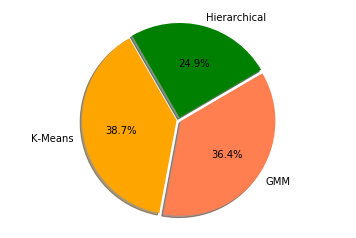

In [295]:
import matplotlib.pyplot as plt
slices_hours = [A1, A2, A3]
activities = ['K-Means', 'GMM', 'Hierarchical']
explode = (0.025, 0.025, 0.025)
colors = ['orange', 'coral','green']
fig1, ax1 = plt.subplots()
ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.show()